>[StatsModels: Python Functions for One-sample Tests](#scrollTo=_d8UFZabvkqT)

>>[Example 1. Two-tailed test](#scrollTo=xxAOUKnzwviu)

>>>[Performing the test using the formulae](#scrollTo=L4oM3SUQyHMF)

>>[Example 2. Upper tail test](#scrollTo=945BzlK6w4vH)

>>>[Performing the test using the formulae](#scrollTo=2D33EE3Q1VQi)

>>[Example 3. Lower tail test](#scrollTo=xwZePwfRxVYp)

>>>[Performing the test using the formulae](#scrollTo=BW9Nfso_2NL9)

>>[Example 4. Two tailed t test](#scrollTo=dVm9q66w2mek)

>>>[Performing the test using the formulae](#scrollTo=24Wlslzu80nq)

>>[Example 5. Power of the test for the mean (Example 8.7 Devore)](#scrollTo=Ldu5yHtF-uF4)

>>[Example 6. Proportion test](#scrollTo=UoyEnWVlMkpm)

>>[Example 7. Power of the test for the proportion (Example 8.14 Devore)](#scrollTo=824WC7MzQG9I)



In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')
%matplotlib inline

import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp

<ipython-input-1-e9d596ca639c>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# <font color="slateblue">StatsModels: Python Functions for One-sample Tests</font>

The `statsmodels` library contains a number of statistical tests and tools. It is based on `scipy.stats` (and we could actually run all the tests using `scipy.stats`) but it is more intuitive in the way in which the data is managed. Please, have a look at [http://www.statsmodels.org/stable/stats.html](http://www.statsmodels.org/stable/stats.html) for a broad description of the library.

**NOTE**: These statistical functions in general can only be used to compute tests with **raw data**, i.e., when the entire dataset is provided. If summary data, i.e., $\bar{x}, s, n$ are given, you will have to perform the test using the formulae.

To import the library, use:

```python
import statsmodels.stats.weightstats as smw
```

The function we can use to perform one-sample tests is:
- `DescrStatsW()`: To get sample statistics, as well as z-tests (large samples), t-tests (small samples), and confidence intervals. It can also be used to compute the power of a test and the sample size.

## <font color="indianred">Example 1. Two-tailed test</t>

Generate a random sample of $n=50$ observations under a normal distribution with mean $\mu=75k$ and standard deviation $\sigma=10k$. Generate a histogram to visualize the data distribution and compute some summary statistics. Then, test whether the population mean is different to $75k$, using $\alpha=0.05$.

State your hypotheses.

\begin{equation*}
\begin{cases} 
H_0 : & \mu = 75k \\
H_a : & \mu \neq 75k \hspace1.5cm \text{(claim)} 
\end{cases}
\end{equation*}

We generate the sample

In [ ]:
np.random.seed(seed=1000)
mu=75
sigma=10
n=50
x = ss.norm.rvs(mu,sigma,n)
x


array([ 66.95541696,  78.20931547,  74.7451712 ,  81.44323828,
        71.99203327,  78.89474554,  73.92562698,  70.20016925,
        80.95035502,  70.35332474,  81.67281307,  66.9388439 ,
        63.03930166,  70.94039839,  73.1762266 ,  76.03192894,
        73.61578011,  82.05692375,  87.71795276,  65.13252671,
        71.65164547,  74.00518302,  79.071921  ,  84.19387539,
        78.1211801 ,  90.33161065,  69.49826135,  71.16852589,
        66.77059037,  91.00083368,  74.30718701,  75.83209492,
        71.73075325,  74.54202812,  71.95539938,  94.2301013 ,
        74.21340996,  69.17934277,  58.82017764,  83.67260817,
        64.59562915,  81.50421425, 101.99645856,  83.02024514,
        64.03078742,  73.21945554,  70.77129522,  71.69599452,
        63.88837222,  67.57994249])

We plot the histogram

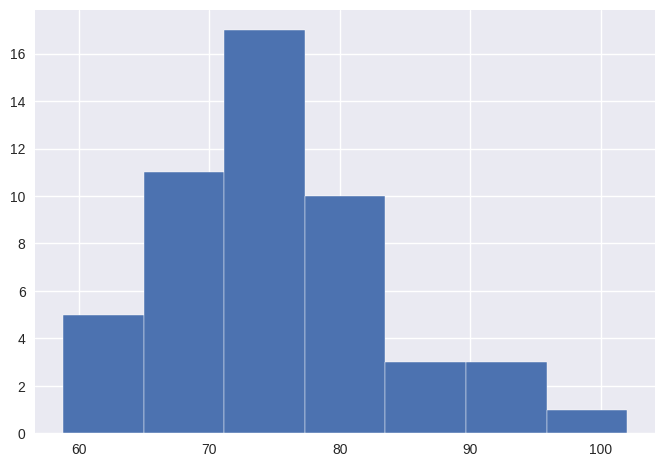

In [ ]:
plt.hist(x, edgecolor="white", bins=7)
plt.show()

We obtain some summary statistics using the function DescrStatsW() from Stats models

In [ ]:
res = smw.DescrStatsW(x)
res.mean, res.std, res.std_mean #standard error

(75.09182433180268, 8.449616020637647, 1.2070880029482354)

We perform the test using Stats models. This is a two-tailed test, and we define the value of the parameter under the null mu0 =75

In [ ]:
zStat, pVal = res.ztest_mean(value=75,alternative='two-sided')
zStat, pVal

(0.07607095056732303, 0.9393626512443475)

Python provides the test statistic and the p-value. Given that $\alpha$=0.05, let us calculate the critical region as follows:

In [ ]:
ss.norm.ppf(.975)

1.959963984540054

Observe that the test statistic is smaller, in absolute value, than the critical value, so we fail to reject. This result is consistent with the p-value, which is greater than α=0.05

Let us report the results using the function **print**. We also report the confidence interval. It is easy to see that the value under the null belongs to the confidence interval since we failed to reject.

In [ ]:
alpha=0.05
# print some output
print("One-sample Test with statsmodels.stats ::")
print("-"*41)
print("xbar    \t = {0:6.3f}".format(res.mean) )
print("s       \t = {0:6.3f}".format(res.std) )
print("SE       \t = {0:6.3f}".format(res.std_mean) )
print("Test stat z \t = {0:6.3f}".format(zStat) )
print("p-value  \t = {0:6.3f}".format(pVal) )
if pVal < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")
print("-"*41)
  
# we can also get the CI
lower, upper = res.zconfint_mean(alpha=0.05, alternative='two-sided')
print("{0:5.2f}% CI : [{1:6.3f}, {2:6.3f}]".format((1-alpha)*100, lower, upper))

 

One-sample Test with statsmodels.stats ::
-----------------------------------------
xbar    	 = 75.092
s       	 =  8.450
SE       	 =  1.207
Test stat z 	 =  0.076
p-value  	 =  0.939
Fail to reject H0
-----------------------------------------
95.00% CI : [72.726, 77.458]


### Performing the test using the formulae


We calculate the required sample statistics using numpy

In [ ]:
xbar=75.092
s=8.45
n=50
mu0=75

In [ ]:
se=s/np.sqrt(50)
se

1.1950104602052651

We calculate the test statistic and the p-value algebraically

In [ ]:
test_stat=(xbar-mu0)/se
test_stat

0.07698677380965857

In [ ]:
(1-ss.norm.cdf(abs(test_stat)))*2

0.938634066709567

## <font color="indianred">Example 2. Upper tail test</t>
Repeat the analysis for the population mean being greater than 75k.

State your hypotheses.

\begin{equation*}
\begin{cases} 
H_0 : & \mu \leq 75k \\
H_a : & \mu > 75k \hspace1.5cm \text{(claim)} 
\end{cases}
\end{equation*}

In [ ]:
zStat, pVal = res.ztest_mean(value=75, alternative='larger')
zStat, pVal

(0.07607095056732303, 0.46968132562217374)

In [ ]:
ss.norm.ppf(0.95)

1.6448536269514722

In [ ]:
res.zconfint_mean(alpha=0.05, alternative='larger')

(73.10634125210368, inf)

### Performing the test using the formulae



In [ ]:

pvalue=1-ss.norm.cdf(test_stat)
test_stat,pvalue


(0.07698677380965857, 0.4693170333547835)

## <font color="indianred">Example 3. Lower tail test</t>
Repeat the analysis for the population mean being smaller than 75k.

State your hypotheses.

\begin{equation*}
\begin{cases} 
H_0 : & \mu \geq 75k \\
H_a : & \mu < 75k \hspace1.5cm \text{(claim)} 
\end{cases}
\end{equation*}

In [ ]:
zStat, pVal = res.ztest_mean(value=75, alternative='smaller')
zStat, pVal

(0.07607095056732303, 0.5303186743778262)

In [ ]:
ss.norm.ppf(0.05)

-1.6448536269514729

In [ ]:
res.zconfint_mean(alpha=0.05, alternative='smaller')

(-inf, 76.00581607700528)

### Performing the test using the formulae



In [ ]:
pvalue=ss.norm.cdf(test_stat)
test_stat,pvalue


(0.07698677380965857, 0.5306829666452165)

## <font color="indianred">Example 4. Two tailed t test</t>
Repeat the analysis for the population mean being different to 75k but using n=15

We generate the sample using n=15

In [ ]:
np.random.seed(seed=1000)
mu=75
sigma=10
n=15
x = ss.norm.rvs(mu,sigma,n)
x

array([66.95541696, 78.20931547, 74.7451712 , 81.44323828, 71.99203327,
       78.89474554, 73.92562698, 70.20016925, 80.95035502, 70.35332474,
       81.67281307, 66.9388439 , 63.03930166, 70.94039839, 73.1762266 ])

We plot the histogram and provide some summary statistics

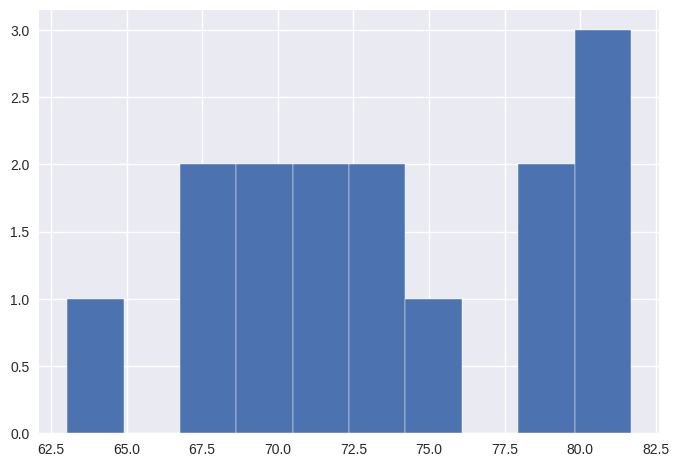

In [ ]:
plt.hist(x, edgecolor="white", bins=10)
plt.show()

In [ ]:
res=smw.DescrStatsW(x)
res.mean, res.std, res.std_mean

(73.56246535521977, 5.5580515657141225, 1.4854517640660512)

We use the t distribution with n-1=14 degrees of freedom

In [ ]:
tStat, pVal, dfreedom = res.ttest_mean(value=75, alternative='two-sided')
tStat, pVal, dfreedom

(-0.9677423929575057, 0.3495948201818756, 14.0)

We calculate the critical value

In [ ]:
ss.t.ppf(0.975,dfreedom)

2.1447866879169273

Observe that the test statistic is smaller, in absolute value, than the critical value, so we fail to reject. This result is consistent with the p-value, greater than $\alpha$=0.05

In [ ]:
res.tconfint_mean(alpha=0.05, alternative='two-sided') 

(70.37648818610819, 76.74844252433135)

### Performing the test using the formulae



In [ ]:
xbar=73.56246535521977
s=5.5680515657141225
se=1.4854517640660512
test_stat=(xbar-75)/se
pvalue=(1-ss.t.cdf(abs(test_stat),df=n-1))*2
test_stat,pvalue

(-0.9677423929575057, 0.3495948201818755)

## <font color="indianred">Example 5. Power of the test for the mean (Example 8.7 Devore)
Consider testing $H_o:\mu=30,000$ versus $H_a:\mu>30,000$ based on a sample of size n=16 from a normal population distribution with $\sigma=1500$. A test with $\alpha=.01$ requires $z_{\alpha}=z_{.01}=2.33$. Calculate the probability of making a type II error when $\mu'=31,000$

Assuming Normality

In [ ]:
import statsmodels.stats.power as ssp

Power of the test

In [ ]:
ssp.normal_power_het(1000, 16, 0.01, std_null=1500, std_alternative=None, alternative='larger')

0.6331917667993824

Required sample size

In [ ]:
ssp.zt_ind_solve_power(effect_size=(30100-30000)/1500, nobs1=None, alpha=0.01, power=0.99, ratio=0, alternative='larger')

4870.70498793308

Using the t

In [ ]:
from statsmodels.stats.power import TTestPower

Power of the test

In [ ]:
TTestPower().power(effect_size=(31000-30000)/1500, nobs=16, alternative='larger',alpha=0.01)

0.5395840727578776

Solving for n

In [ ]:
TTestPower().solve_power(effect_size=(31000-30000)/1500, nobs=None, alpha=0.01, power=0.5395840727578776, alternative='larger')

16.000000002734126

## <font color="indianred">Example 6. Proportion test</t>

In Redonda Island, a random sample of 100 people shows that 55 support the present Queen. Test if the true proportion of Queen's supporters is different from $0.60$, using $\alpha=0.05$.

State your hypotheses.

\begin{equation*}
\begin{cases} 
H_0 : & p = 0.6 \\
H_a : & p \neq 0.6 \hspace1.5cm \text{(claim)} 
\end{cases}
\end{equation*}

We solve the exercise using **statsmodels**

We define the null hypothesis as p0=0.6

In [ ]:
n=100
x=55
phat=x/n
phat*(1-phat)*n

24.75

In [ ]:
p0=0.6

In [ ]:
smp.proportions_ztest(count=55, nobs=100, value=p0, alternative='two-sided', prop_var=p0)


(-1.0206207261596563, 0.3074341659273959)

If the true proportion of supporters is 60%, the probability of taking a sample of 100 individuals and obtaining $phat=0.55$ is $0.31$ since the sample statistic is approximately 1 standard error from the population parameter under the null. Hence, we fail to reject the null hypothesis, there is no evidence enough to reject that the supporters of the Queen are 60%  

We solve the exercise using **scipy.stats**

In [ ]:
p0=0.6
n=100 
successes=55
phat=successes/n
se=np.sqrt(p0*(1-p0)/n)
test_stat=(phat-p0)/se
pVal=(1-ss.norm.cdf(abs(test_stat)))*2
test_stat,pVal

(-1.0206207261596563, 0.30743416592739603)

## <font color="indianred">Example 7. Power of the test for the proportion (Example 8.14 Devore)
Let p denote the true proportion of packages that are delivered as advertised and consider the hypotheses $H_o:p=0.9$ versus $H_a:p<0.9$. If only 80% of the packages are delivered as advertised, how likely is it that a level 0.01 test based on n=225 packages will detect such a departure from $H_{o}$

In [ ]:
ssp.normal_power_het(-0.1, 225, 0.01, std_null=0.3, std_alternative=0.4, alternative='smaller')

0.9775312537544812

In [ ]:
ssp.zt_ind_solve_power(effect_size=-0.1/0.35, nobs1=None, alpha=0.01, power=0.99, ratio=0, alternative='smaller')

265.18282757340137